<a href="https://colab.research.google.com/github/NeuralClassifier/ReusabilityRate_ML/blob/main/SelectingTheBestModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-learn==1.0.1
!pip install -U tensorflow==2.7.0
!pip install -U seaborn==0.11.2
!pip install -U matplotlib==3.5.0
!pip install -U pandas==1.3.4

In [26]:
import numpy as np
import pandas as pd
import warnings
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/NeuralClassifier/ReusabilityRate_ML

Cloning into 'ReusabilityRate_ML'...
remote: <html>
remote: <head><title>404 Not Found</title></head>
remote: <body>
remote: <center><h1>404 Not Found</h1></center>
remote: <hr><center>nginx</center>
remote: </body>
remote: </html>
fatal: unable to access 'https://github.com/NeuralClassifier/ReusabilityRate_ML/': The requested URL returned error: 504


In [52]:
warnings.filterwarnings('ignore')
class SelectBest:
  def __init__(self,dfname):
    if dfname.lower() == 'class':
      self.df = pd.read_excel('Results/classRes_TraditionalModels_refined.xlsx')
      self.df.drop(['Unnamed: 0'],axis =1, inplace=True)
      self.list_of_metrics = list(self.df['Metric'].unique())
      self.level='class'
    elif dfname.lower() == 'package':

      self.df = pd.read_excel('Results/packageRes_TraditionalModels_refined.xlsx')
      self.df.drop(['Unnamed: 0'],axis =1, inplace=True)
      self.list_of_metrics = list(self.df['Metric'].unique())
      self.level='package'
    else:
      print('wrong input!! Try again :)')

  def best_model(self,metrics):

    #if dfname.lower() == 'class':
      #df = pd.read_excel('Results/classRes_TraditionalModels.xlsx')
      #df.drop(['Unnamed: 0'],axis =1, inplace=True)
      #list_of_metrics = list(df['Metric'].unique())
      
    if metrics.lower() == 'rmse':
  
      best_model = []
      for i in self.list_of_metrics:
        df_temp = self.df[self.df['Metric']==i]
        best_idx = df_temp[df_temp.RMSE == df_temp.RMSE.min()].index[0]
        bestModel = self.df.iloc[best_idx,2]
        best_model.append(['RMSE',i,bestModel])

      return best_model

    elif metrics.lower() == 'mae':

      best_model = []
      for i in self.list_of_metrics:
        df_temp = self.df[self.df['Metric']==i]
        best_idx = df_temp[df_temp.MAE == df_temp.MAE.min()].index[0]
        bestModel = self.df.iloc[best_idx,2]
        best_model.append(['MAE',i,bestModel])

      return best_model

    else:
      print('wrong input!! Try again :)')

    #elif dfname.lower() == 'package':

      #df = pd.read_excel('Results/packageRes_TraditionalModels.xlsx')
      #df.drop(['Unnamed: 0'],axis =1, inplace=True)
      #list_of_metrics = list(df['Metric'].unique())

    if metrics.lower() == 'rmse':
      best_model = []
      for i in self.list_of_metrics:
        df_temp = self.df[self.df['Metric']==i]
        best_idx = df_temp[df_temp.RMSE == df_temp.RMSE.min()].index[0]
        bestModel = self.df.iloc[best_idx,2]
        best_model.append(['RMSE',i,bestModel])

      return best_model
      
    elif metrics.lower() == 'mae':
      best_model = []
      for i in self.list_of_metrics:
        df_temp = self.df[self.df['Metric']==i]
        best_idx = df_temp[df_temp.MAE == df_temp.MAE.min()].index[0]
        bestModel = self.df.iloc[best_idx,2]
        best_model.append(['MAE',i,bestModel])

      return best_model
      
    else:
      print('wrong input!! Try again :)')

      #return list_of_metrics

    #else:
      #print('wrong input!! Try again :)')
  def best_metric(self,measure):
    avg_score = []
    for i in self.list_of_metrics:
      df_temp = self.df[self.df['Metric']==i]
      avg = df_temp.RMSE.mean()
      avg_score.append([i,avg])
    #return min(avg_score)
    avg_score = np.array(avg_score)
    metric_name=''
    min_value=100000000000000000000001010101010101010101010
    for i in avg_score:
      if float(i[1])<min_value:
        metric_name = i[0]
        min_value = float(i[1])
    print('Best Metric: ', metric_name, 'Avg Score: ', min_value)
    #return avg_score
    choice_to_show = input('You want to see the average scores for each metric (Y/N): ')
    if choice_to_show.lower() == 'y':
      print(avg_score)
  
  def plot_best_model(self,metric):
    
    D = self.best_model(metric)
    D = list(np.array(D)[:,2])
    D = Counter(D)
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    #plt.savefig('BestModel_Plots/bestModels_'+self.level.lower()+'Level_'+metric+'.png')
    plt.show()

In [53]:
sb = SelectBest('Class')
svg_arr=sb.best_metric('RMSE')

Best Metric:  NL Avg Score:  0.020645023941153116
You want to see the average scores for each metric (Y/N): 


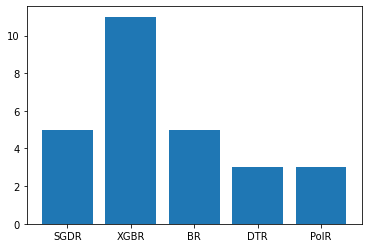

In [54]:
sb.plot_best_model('mae')